In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = os.path.join('data','zippedData')
data_files = os.listdir(data_path)
data_files.pop(data_files.index('Untitled.ipynb'))
data_files = [os.path.join(data_path,file) for file in data_files]

data = {}
name_dict={'imdb.title.crew.csv.gz':"crew",
           'tmdb.movies.csv.gz':"movies",
           'imdb.title.akas.csv.gz':"akas",
           'imdb.title.ratings.csv.gz':"ratings",
           'imdb.name.basics.csv.gz':"name_basics",
           'rt.reviews.tsv.gz':"reviews",
           'imdb.title.basics.csv.gz':"title_basics",
           'rt.movie_info.tsv.gz':"movie_info",
           'tn.movie_budgets.csv.gz':"movie_budgets",
           'bom.movie_gross.csv.gz':"movie_gross",
           'imdb.title.principals.csv.gz':"principals"
          }
for file in data_files:
    try:
        df = pd.read_csv(file)
    except:
        continue
    file_name = file.split('/')[-1]
    data[name_dict[file_name]] = df
    
data["movie_info"]=pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep="\t")
data["reviews"]=pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep="\t", encoding="latin1")

data['title_basics'] = data['title_basics'].rename(columns={'primary_title':'title'})
data['movie_budgets'] = data['movie_budgets'].rename(columns={'movie':'title'})

data['movie_budgets']['worldwide_gross'] = data['movie_budgets']['worldwide_gross'].str.replace(',', '')
data['movie_budgets']['worldwide_gross'] = data['movie_budgets']['worldwide_gross'].str.replace('$', '')
data['movie_budgets']['worldwide_gross'] = data['movie_budgets']['worldwide_gross'].astype(int)
data['movie_budgets']['production_budget'] = data['movie_budgets']['production_budget'].str.replace(',', '')
data['movie_budgets']['production_budget'] = data['movie_budgets']['production_budget'].str.replace('$', '')
data['movie_budgets']['production_budget'] = data['movie_budgets']['production_budget'].astype(int)
data['movie_budgets']['domestic_gross'] = data['movie_budgets']['domestic_gross'].str.replace(',', '')
data['movie_budgets']['domestic_gross'] = data['movie_budgets']['domestic_gross'].str.replace('$', '')
data['movie_budgets']['domestic_gross'] = data['movie_budgets']['domestic_gross'].astype(int)

data['movie_budgets'] = data['movie_budgets'].drop(columns=['release_date','domestic_gross'])

data['ratings'] = data['ratings'][data['ratings'].numvotes >= 100]

data['ratings']['mean_diff'] = data['ratings'].averagerating - data['ratings'].averagerating.mean()

data['akas'].rename(columns={'title_id': 'tconst'}, inplace = True)

tconst_to_title = pd.merge(data['akas'],data['ratings'],on='tconst')

tconst_to_title = tconst_to_title.drop(columns=['ordering','region','language','types','attributes','is_original_title'])

master_table = pd.merge(tconst_to_title,data['movie_budgets'],on='title')

master_table['success_score'] = master_table.mean_diff * (master_table.worldwide_gross / master_table.production_budget)

master_table[master_table.tconst == 'tt0369610']

master_table.drop_duplicates(subset = ['tconst'],inplace=True)

master_table = pd.merge(data['title_basics'],master_table,on='tconst')

master_table["roi"]=master_table.worldwide_gross/master_table.production_budget

master_table["net_profit"]=master_table.worldwide_gross-master_table.production_budget

master_table


,tconst,title_x,original_title,start_year,runtime_minutes,genres,title_y,averagerating,numvotes,mean_diff,id,production_budget,worldwide_gross,success_score,roi,net_profit
0,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",Saving Grace,8.1,263,2.192985,95,4000000,27786849,15.234036,6.946712,23786849
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Foodfight!,1.9,8248,-4.007015,26,45000000,73706,-0.006563,0.001638,-44926294
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,6.1,37886,0.192985,17,25000000,9313302,0.071893,0.372532,-15686698
3,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,Whiplash,5.6,2420,-0.307015,43,3300000,38969037,-3.625478,11.808799,35669037
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,7.3,275300,1.392985,37,91000000,187861183,2.875690,2.064409,96861183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,tt8941440,Virus,Virus,2019,152.0,"Drama,Thriller",Virus,8.6,372,2.692985,69,75000000,30626690,1.099696,0.408356,-44373310
2517,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",Unplanned,6.3,5945,0.392985,33,6000000,18107621,1.186004,3.017937,12107621
2518,tt9174334,The Villagers,The Villagers,2018,99.0,"Action,Thriller",Ordinary People,5.7,101,-0.207015,18,6000000,52302978,-1.804583,8.717163,46302978
2519,tt9225192,Unstoppable,Seongnan hwangso,2018,116.0,"Action,Crime",Unstoppable,6.5,576,0.592985,19,95000000,165720921,1.034421,1.744431,70720921


In [7]:
#importing relevant libraries

import os
import pandas as pd 
import numpy as np

#Turn data folder into list of data file names

data_path = os.path.join('data','zippedData')
data_files = os.listdir(data_path)
#data_files.pop(data_files.index('.ipynb_checkpoints'))
data_files.pop(data_files.index('Untitled.ipynb'))
data_files = [os.path.join(data_path,file) for file in data_files]
data_files

#Turn all data files into pandas dataframes 


data = {}
name_dict={'imdb.title.crew.csv.gz':"crew",
           'tmdb.movies.csv.gz':"movies",
           'imdb.title.akas.csv.gz':"akas",
           'imdb.title.ratings.csv.gz':"ratings",
           'imdb.name.basics.csv.gz':"name_basics",
           'rt.reviews.tsv.gz':"reviews",
           'imdb.title.basics.csv.gz':"title_basics",
           'rt.movie_info.tsv.gz':"movie_info",
           'tn.movie_budgets.csv.gz':"movie_budgets",
           'bom.movie_gross.csv.gz':"movie_gross",
           'imdb.title.principals.csv.gz':"principals"
          }
for file in data_files:
    try:
        df = pd.read_csv(file)
    except:
        print(file)
        continue
    file_name = file.split('/')[-1]
    data[name_dict[file_name]] = df
    
data["movie_info"]=pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep="\t")
data["reviews"]=pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep="\t", encoding="latin1")

#Renaming columns to be able to merge on 'title' and 'tconst' columns

data['title_basics'].rename(columns={'primary_title':'title'}, inplace = True)
data['movie_budgets'].rename(columns={'movie':'title'}, inplace = True)
data['akas'].rename(columns={'title_id': 'tconst'}, inplace = True)

#Getting rid of commas and dollar signs to make dataframe values easier to work with 

data['movie_budgets']['worldwide_gross'] = data['movie_budgets']['worldwide_gross'].str.replace(',', '')
data['movie_budgets']['worldwide_gross'] = data['movie_budgets']['worldwide_gross'].str.replace('$', '')
data['movie_budgets']['worldwide_gross'] = data['movie_budgets']['worldwide_gross'].astype(int)

data['movie_budgets']['production_budget'] = data['movie_budgets']['production_budget'].str.replace(',', '')
data['movie_budgets']['production_budget'] = data['movie_budgets']['production_budget'].str.replace('$', '')
data['movie_budgets']['production_budget'] = data['movie_budgets']['production_budget'].astype(int)


#Filter ratings dataframe to a minimum of 100 votes

data['ratings'] = data['ratings'][data['ratings'].numvotes >= 100]

#Merging data on tconst

tconst_to_title = pd.merge(data['akas'],data['ratings'],on='tconst')

#Dropping uncessary columns from tconst_to_title dataframe

tconst_to_title = tconst_to_title.drop(columns=['ordering','region','language','types','attributes','is_original_title'])
data['movie_budgets'] = data['movie_budgets'].drop(columns=['release_date','domestic_gross'])

#Merging tconst_to_title dataframe with movie_budgets dataframe on 'title' column

master_table = pd.merge(tconst_to_title,data['movie_budgets'],on='title')

#Defining 'Composite Quality Score', Net Profit and ROI to help define successful movies

master_table['success_score'] = master_table.averagerating * (master_table.worldwide_gross / master_table.production_budget)
master_table["roi"]=master_table.worldwide_gross/master_table.production_budget
master_table["net_profit"]=master_table.worldwide_gross-master_table.production_budget

#Dropping duplicates from 'tconst' column in master_table dataframe

master_table.drop_duplicates(subset = ['tconst'],inplace=True)

#Merging title_basics dataframe to master_table dataframe on tconst

master_table = pd.merge(data['title_basics'],master_table,on='tconst')

#Merging movie_info dataframe to master_table dataframe

master_table = pd.merge(master_table, data['movie_info'],on='id')

#Drop remaining unnecessary columns

master_table.drop(columns=['original_title','title_y','theater_date','dvd_date','currency','box_office','studio','synopsis','runtime','writer'], inplace=True)

master_table.sort_values(by='worldwide_gross', ascending = False, inplace=True)

#master_table = master_table.dropna(subset = ['director'])

master_table

data/zippedData/rt.reviews.tsv.gz
data/zippedData/rt.movie_info.tsv.gz


,tconst,title_x,start_year,runtime_minutes,genres,averagerating,numvotes,id,production_budget,worldwide_gross,success_score,roi,net_profit,rating,genre,director
1020,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,7,300000000,2048134200,58.030469,6.827114,1748134200,NR,Drama|Romance,Rodney Bennett
131,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,215000000,1648854864,53.683647,7.669092,1433854864,PG-13,Action and Adventure|Mystery and Suspense,John Woo
124,tt2820852,Furious 7,2015,137.0,"Action,Crime,Thriller",7.2,335074,67,190000000,1518722794,57.551601,7.993278,1328722794,R,Horror,Matt Bettinelli-Olpin|Tyler Gillett
595,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,27,225000000,1517935897,54.645692,6.746382,1292935897,NR,Musical and Performing Arts,NaN
708,tt1825683,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,42,200000000,1348258224,49.211425,6.741291,1148258224,G,Action and Adventure|Classics|Drama|Mystery an...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,tt2655734,Bang Bang Baby,2014,90.0,"Drama,Fantasy,Musical",5.0,469,21,1000000,0,0.000000,0.000000,-1000000,R,Comedy,Peter Baldwin
915,tt1376213,The Adventurer: The Curse of the Midas Box,2013,100.0,"Adventure,Family,Fantasy",5.4,5257,29,25000000,0,0.000000,0.000000,-25000000,PG,Action and Adventure|Drama|Science Fiction and...,Martyn Burke
917,tt1430811,Deadline,2012,95.0,"Drama,Mystery,Thriller",4.8,396,29,1800000,0,0.000000,0.000000,-1800000,PG,Action and Adventure|Drama|Science Fiction and...,Martyn Burke
123,tt2229377,Enter the Dangerous Mind,2013,88.0,Thriller,5.2,915,67,3000000,0,0.000000,0.000000,-3000000,R,Horror,Matt Bettinelli-Olpin|Tyler Gillett


## What Effect Does Genre Have on a Movie's Success?

All movies from the data set were decomposed into their corresponding genres. Each like genre was then grouped across all movies in the data set and measured against the four established success indicators (shown in graphs below).

Across all four success indicators, Animation and Adventure score overwhelmingly higher than other genres (for instance, Animation's median net profit is over twice that of Action, the third-hightest profiting genre).

<BarContainer object of 22 artists>

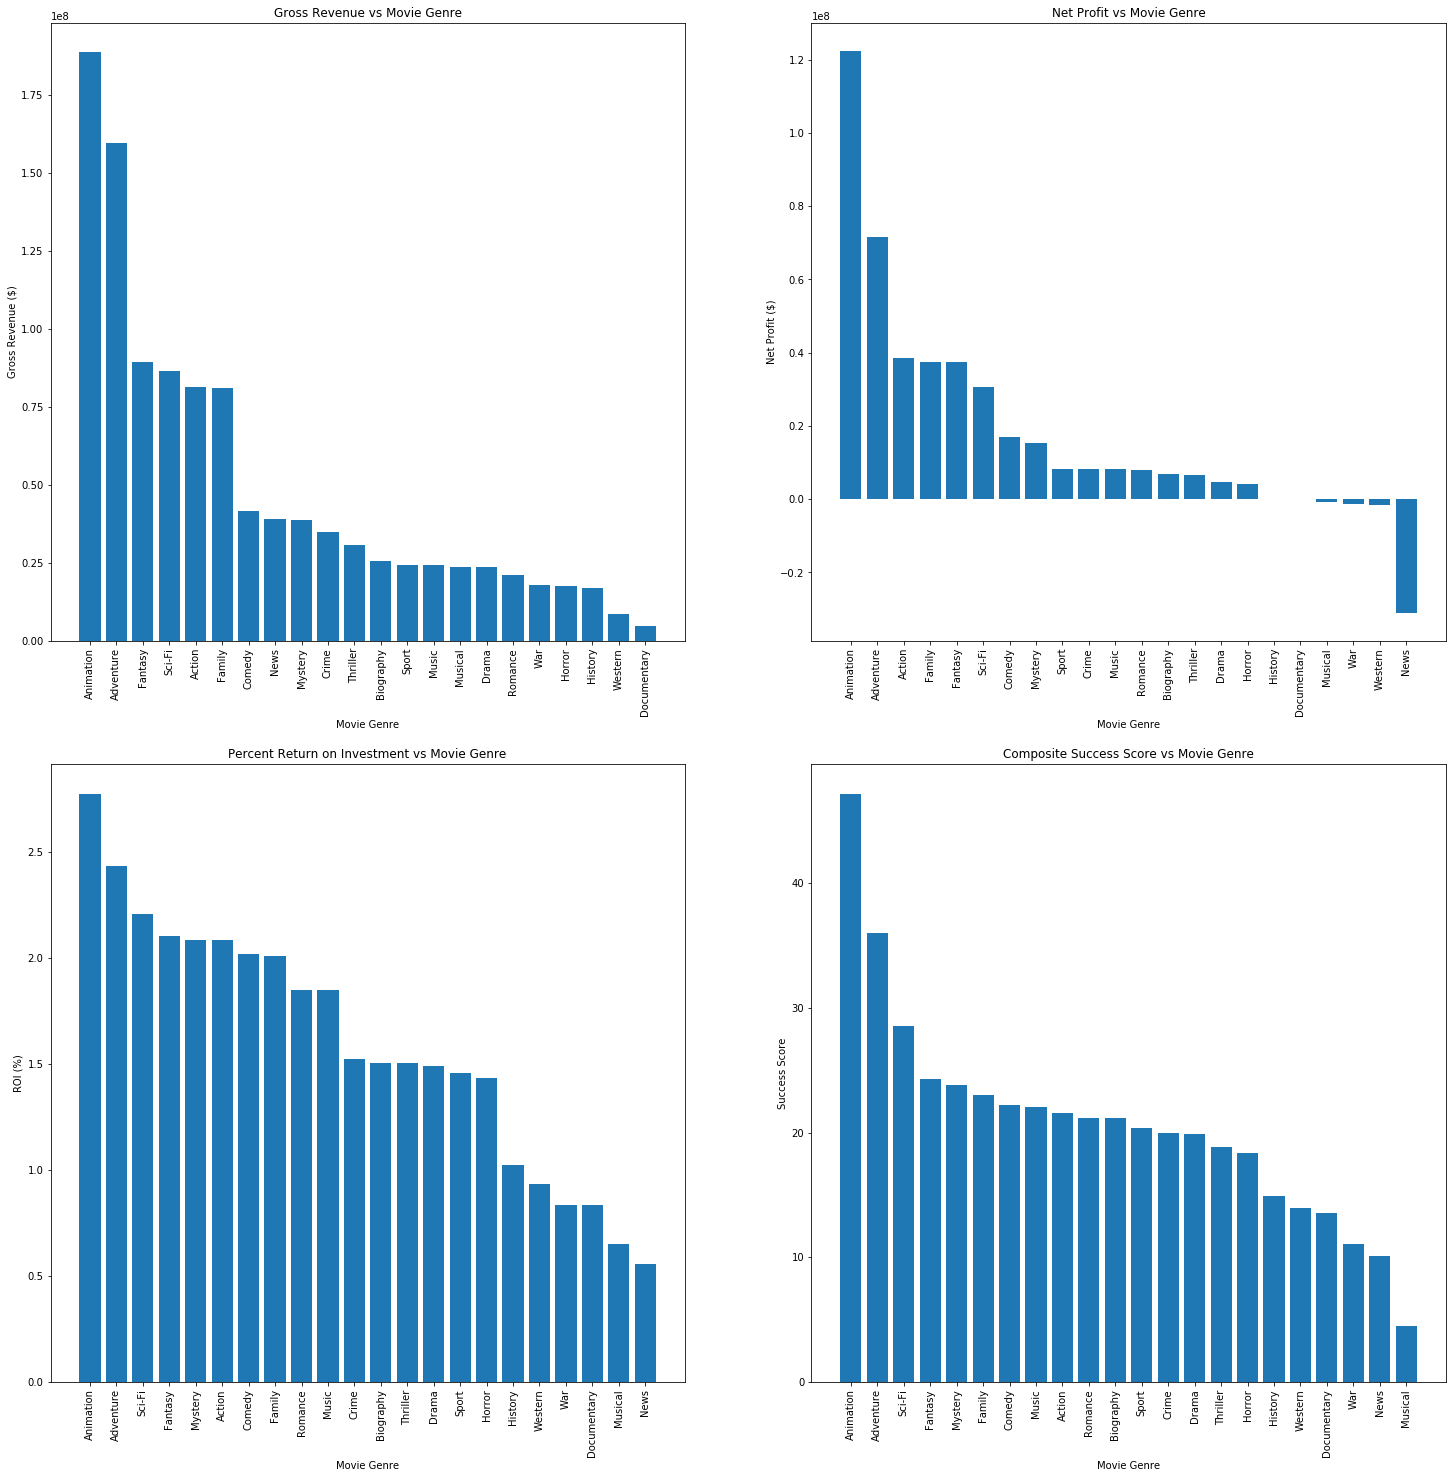

In [12]:
# Extract all values for genre from data set

unique_genre_combos=list(master_table["genres"].unique())

# Values are listed as combinations delimited by commas.
# Separate these combinations into a list of unique genres so that each 
# can be analyzed individually.

genre_list=[]
for genres in unique_genre_combos:
    genre_list.append(genres.split(","))

genre_master=[]
for genre in genre_list:
    for subgenre in genre:
        genre_master.append(subgenre)

unique_genre_master=set(genre_master)

# Using the list of unique genres, loop through the data set to find each movie that is
# aligned to each genre. Create a dataframe documenting these relationships.

vector=list(range(0,len(master_table.tconst)))
df_genres=[]
df_consts=[]

for genre in unique_genre_master:
    for number in vector:
        if genre in master_table.iloc[number, 4]:
            df_genres.append(genre)
            df_consts.append(master_table.iloc[number, 0])

genre_table=pd.DataFrame({'tconst':df_consts, 'ugenre':df_genres})

# Merge the new genre/movie data frame to the master data table in order to link budget data
# back to genre.

complete_genre_table=pd.merge(genre_table, master_table, how="left", on="tconst")

# Graph genre values against each of the four established measures of success

figure, ax = plt.subplots(2, 2, figsize=(25, 25))

# Establish x and y values for plots

x0_gross_rev=complete_genre_table.groupby("ugenre").median().sort_values(by='worldwide_gross', ascending=False).index
x1_net_prof=complete_genre_table.groupby("ugenre").median().sort_values(by='net_profit', ascending=False).index
x2_roi_percent=complete_genre_table.groupby("ugenre").median().sort_values(by='roi', ascending=False).index
x3_comp=complete_genre_table.groupby("ugenre").median().sort_values(by='success_score', ascending=False).index
y0_gross_rev= complete_genre_table.groupby("ugenre").median().sort_values(by='worldwide_gross', ascending=False).worldwide_gross
y1_net_prof= complete_genre_table.groupby("ugenre").median().sort_values(by='net_profit', ascending=False).net_profit
y2_roi_percent= complete_genre_table.groupby("ugenre").median().sort_values(by='roi', ascending=False).roi
y3_comp= complete_genre_table.groupby("ugenre").mean().sort_values(by='success_score', ascending=False).success_score 

# Set axes for all four graphs

ax[0][0].set_title('Gross Revenue vs Movie Genre')
ax[0][0].set_xlabel('Movie Genre')
ax[0][0].set_ylabel('Gross Revenue ($)')

ax[0][1].set_title('Net Profit vs Movie Genre')
ax[0][1].set_xlabel('Movie Genre')
ax[0][1].set_ylabel('Net Profit ($)')

ax[1][0].set_title('Percent Return on Investment vs Movie Genre')
ax[1][0].set_xlabel('Movie Genre')
ax[1][0].set_ylabel('ROI (%)')

ax[1][1].set_title('Composite Success Score vs Movie Genre')
ax[1][1].set_xlabel('Movie Genre')
ax[1][1].set_ylabel('Success Score')

ax[0][0].set_xticklabels(x0_gross_rev,rotation=90)
ax[0][1].set_xticklabels(x1_net_prof,rotation=90)
ax[1][0].set_xticklabels(x2_roi_percent,rotation=90)
ax[1][1].set_xticklabels(x3_comp,rotation=90)

# Graph the four plots

ax[0][0].bar(x0_gross_rev, y0_gross_rev)
ax[0][1].bar(x1_net_prof, y1_net_prof)
ax[1][0].bar(x2_roi_percent, y2_roi_percent)
ax[1][1].bar(x3_comp, y3_comp)


## What Effect Does Runtime Have on a Movie's Success?

All movies in the dataset were sequenced based on their length in minutes. Each movie's corresponding revenue, profit, ROI, and success composite score were then individually plotted against length as single data points. In tandem the correlations between runtime and these four success indicators were calculated in order to determine whether or not runtime is meaningfully related to a movie's success.

In general, there did not appear to be a strong linkage between a movie's runtime and its success. The strongest correlations, which were for gross revenue and net profit, were only weakly positive. No substantive linkage was observed for ROI or success composite score. Overall, then, perhaps the main takeaway from this analysis is that a movie shouldn't be excessively short, but that any runtime after normal feature length appears to have no bearing on success.

{'Runtime Correlations': {'Gross Revenue': 0.26641808736174877,
  'Net Profit': 0.23923708417489492,
  'ROI': 0.009307925305264553,
  'Success Composite': 0.05092268242353467}}

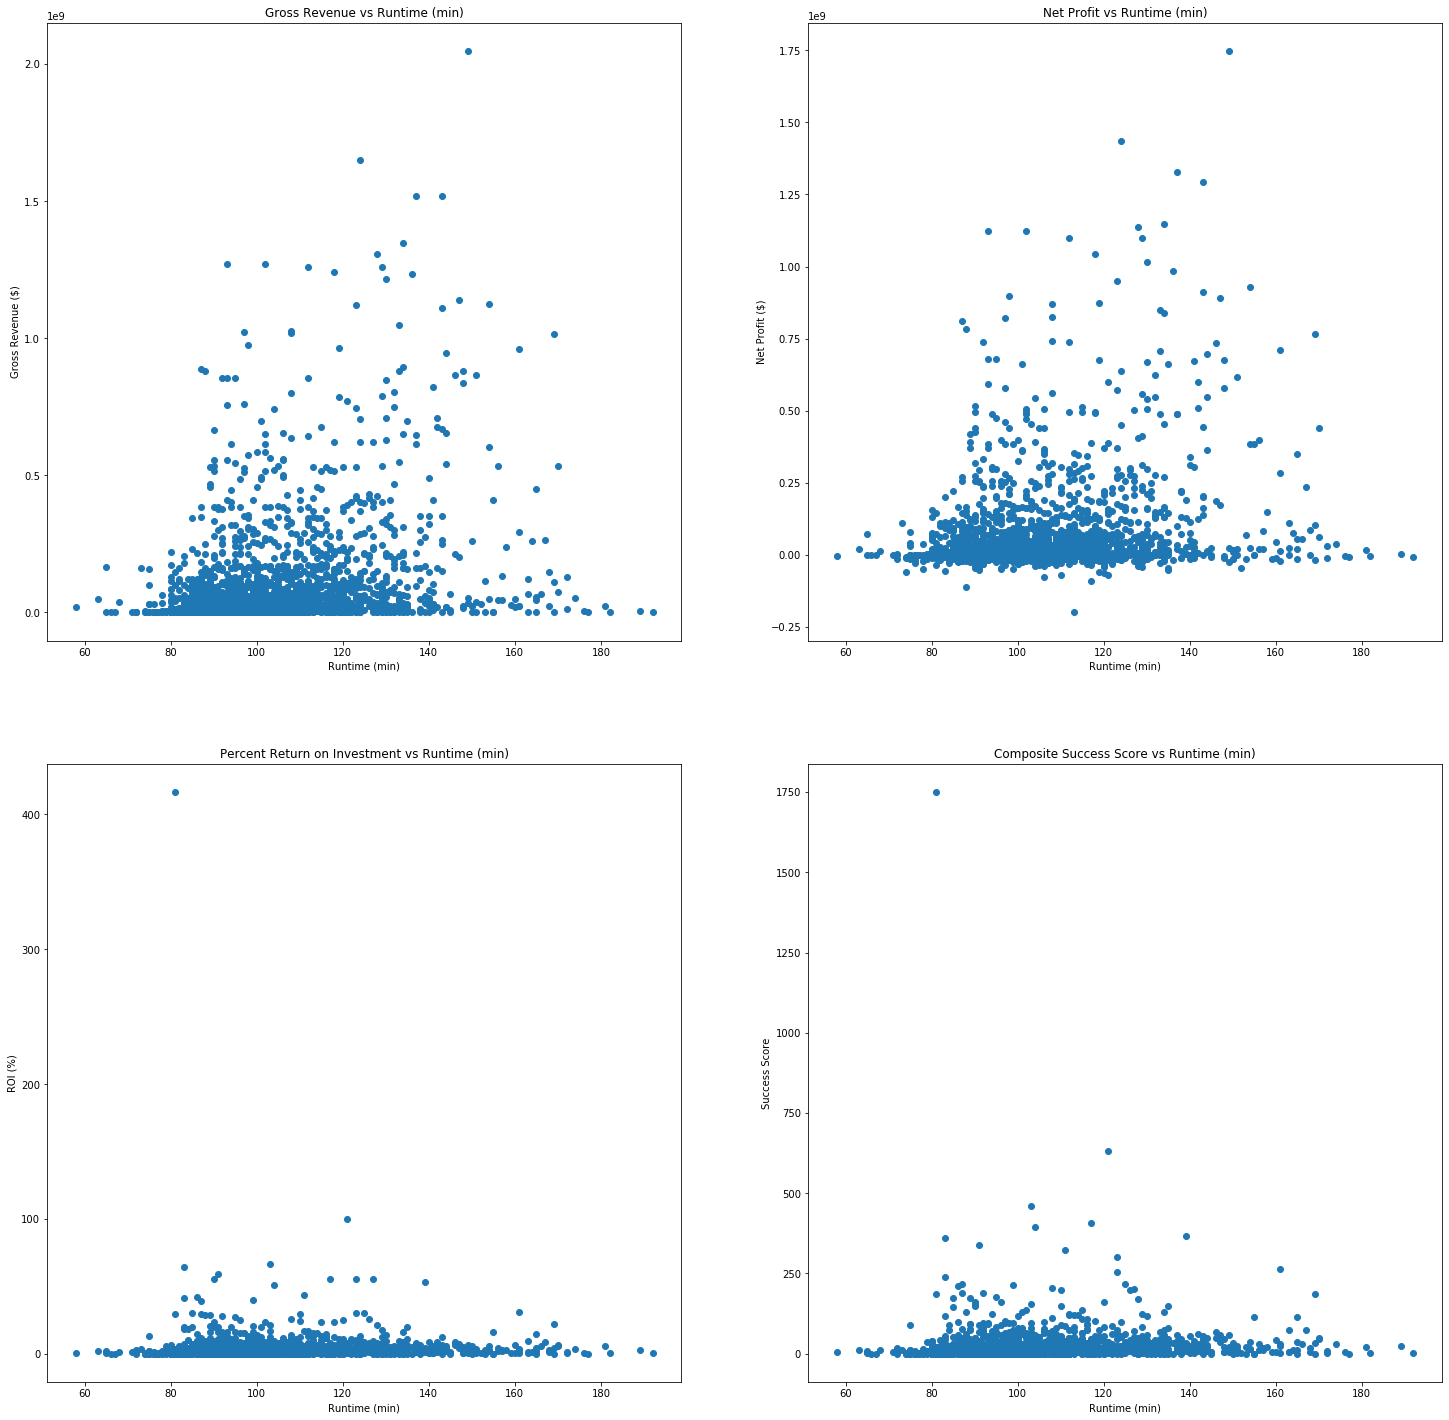

In [13]:
# Graph runtime values against each of the four established measures of success

figure, ax = plt.subplots(2, 2, figsize=(25, 25))

# Establish x and y values for plots

x=master_table.dropna(subset=["runtime_minutes"], axis=0).sort_values(by='runtime_minutes', ascending=True).runtime_minutes
y0_gross_rev= master_table.dropna(subset=["runtime_minutes"], axis=0).sort_values(by='runtime_minutes', ascending=True).worldwide_gross
y1_net_prof= master_table.dropna(subset=["runtime_minutes"], axis=0).sort_values(by='runtime_minutes', ascending=True).net_profit
y2_roi_percent= master_table.dropna(subset=["runtime_minutes"], axis=0).sort_values(by='runtime_minutes', ascending=True).roi
y3_comp= master_table.dropna(subset=["runtime_minutes"], axis=0).sort_values(by='runtime_minutes', ascending=True).success_score 

# Set axes for all four graphs

ax[0][0].set_title('Gross Revenue vs Runtime (min)')
ax[0][0].set_xlabel('Runtime (min)')
ax[0][0].set_ylabel('Gross Revenue ($)')

ax[0][1].set_title('Net Profit vs Runtime (min)')
ax[0][1].set_xlabel('Runtime (min)')
ax[0][1].set_ylabel('Net Profit ($)')

ax[1][0].set_title('Percent Return on Investment vs Runtime (min)')
ax[1][0].set_xlabel('Runtime (min)')
ax[1][0].set_ylabel('ROI (%)')

ax[1][1].set_title('Composite Success Score vs Runtime (min)')
ax[1][1].set_xlabel('Runtime (min)')
ax[1][1].set_ylabel('Success Score')

# Graph the four plots

ax[0][0].scatter(x, y0_gross_rev)
ax[0][1].scatter(x, y1_net_prof)
ax[1][0].scatter(x, y2_roi_percent)
ax[1][1].scatter(x, y3_comp)

# Calculate correlations between runtime and success indicators

correlations={"Runtime Correlations":{"Gross Revenue":y0_gross_rev.corr(x),
"Net Profit": y1_net_prof.corr(x),
"ROI": y2_roi_percent.corr(x),
"Success Composite":y3_comp.corr(x)}}
correlations

## What Effect Does Production Budget Have on a Movie's Success?

For this analysis, the dataset was sequenced by film production budget. Each of the four established success indicators were then individually plotted against production budget, again as single data points. Correlations between budget and these four success indicators were again calculated to gauge the strength of the relationship between production budget and success.

Overall, there appeared to be a moderately positive correlation between a movie's production budget and its gross revenue and net profit; correlations were calculated to be ~0.78 and ~0.65, respectively. This is maybe to be expected, though, as it shouldn't be a surprise that a movie earns money often at the same magnitude as the amount it took to produce. Perhaps a more meaningful indicator to focus on here, then, would be ROI since it, by definition, normalizes revenue by cost. The correlation between budget and ROI is very weak, which implies that production budget may not be an influential driver for succes. It is worth noting, however, that the relationship between ROI and production budget is negative (albeit weak), meaning that overall, lower-budget movies may have more potential to be profitable.

{'Production Budget Correlations': {'Gross Revenue': 0.7767659630081142,
  'Net Profit': 0.6506390756807089,
  'ROI': -0.030571436235511527,
  'Success Composite': -0.022948453726534413}}

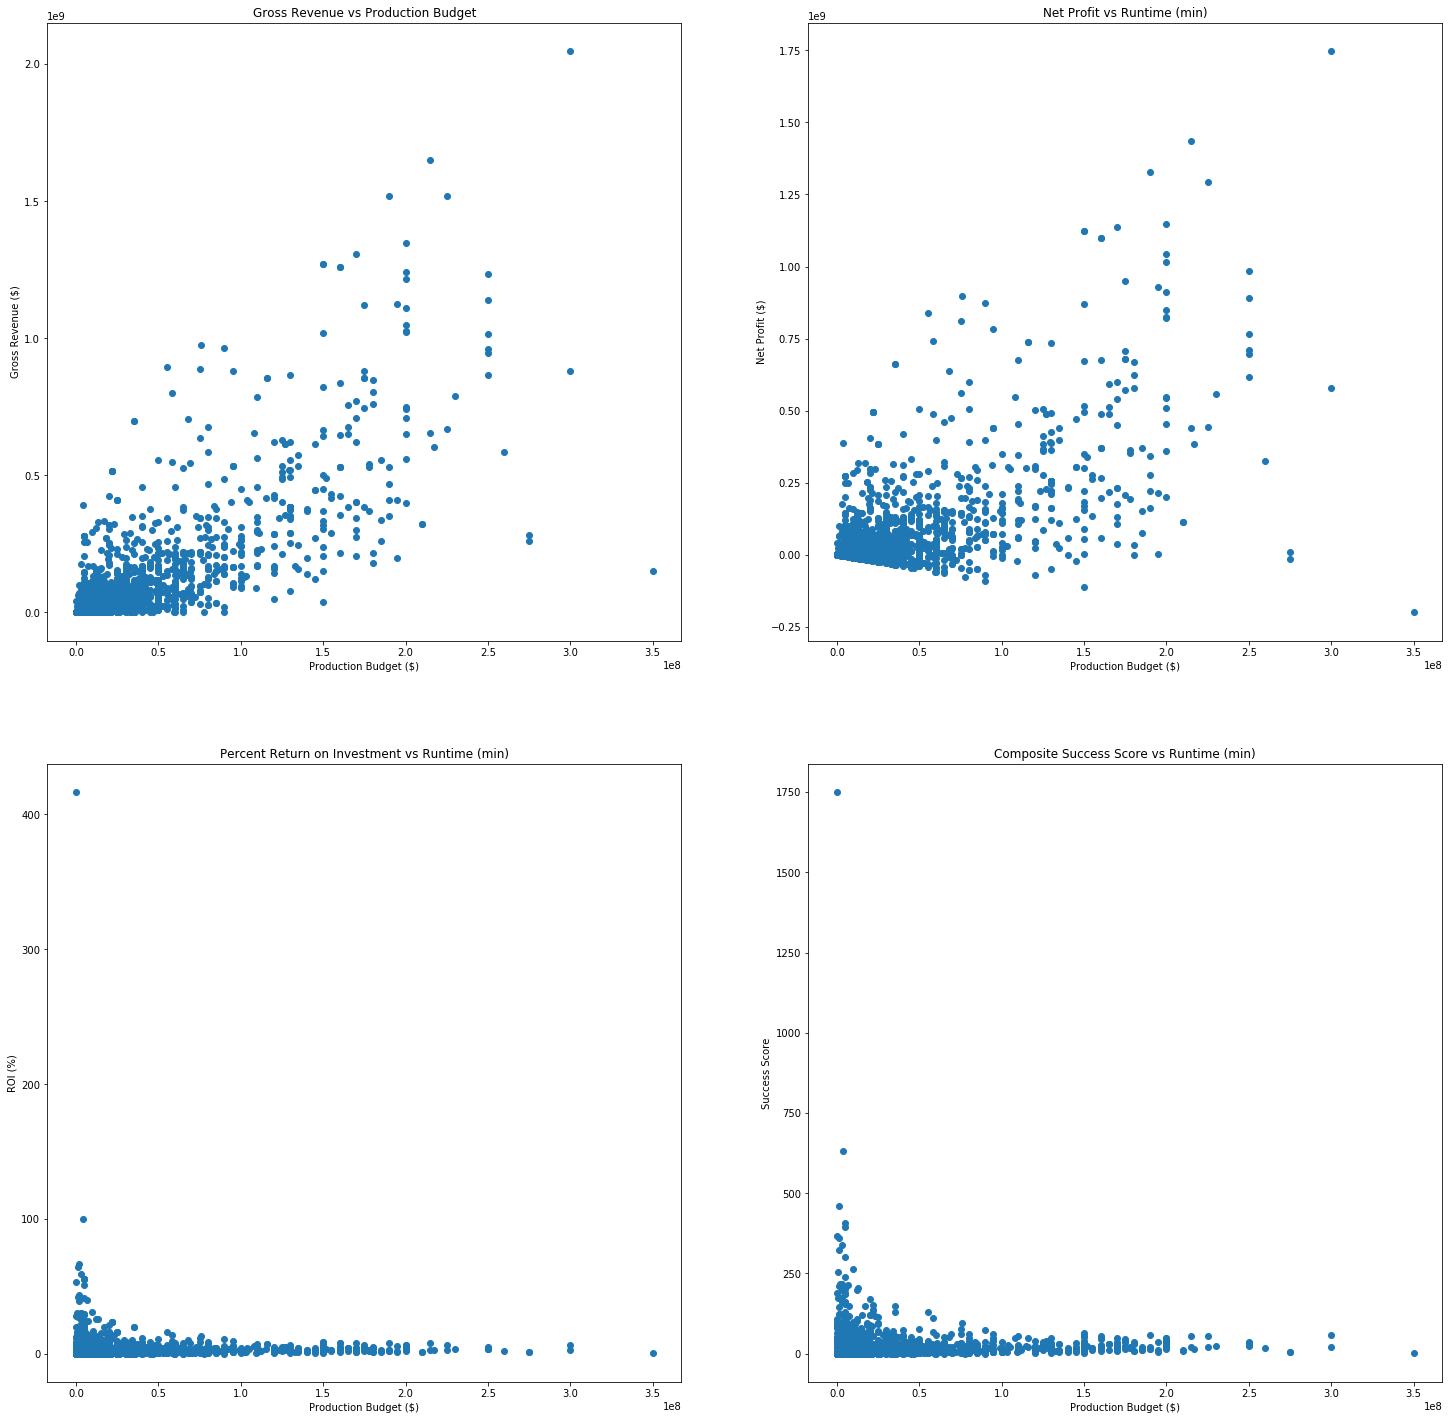

In [14]:
# Graph runtime values against each of the four established measures of success

figure, ax = plt.subplots(2, 2, figsize=(25, 25))

# Establish x and y values for plots

x=master_table.production_budget
y0_gross_rev= master_table.worldwide_gross
y1_net_prof= master_table.worldwide_gross-master_table.production_budget
y2_roi_percent= master_table.worldwide_gross/master_table.production_budget
y3_comp= master_table.success_score 

# Set axes for all four graphs

ax[0][0].set_title('Gross Revenue vs Production Budget')
ax[0][0].set_xlabel('Production Budget ($)')
ax[0][0].set_ylabel('Gross Revenue ($)')

ax[0][1].set_title('Net Profit vs Runtime (min)')
ax[0][1].set_xlabel('Production Budget ($)')
ax[0][1].set_ylabel('Net Profit ($)')

ax[1][0].set_title('Percent Return on Investment vs Runtime (min)')
ax[1][0].set_xlabel('Production Budget ($)')
ax[1][0].set_ylabel('ROI (%)')

ax[1][1].set_title('Composite Success Score vs Runtime (min)')
ax[1][1].set_xlabel('Production Budget ($)')
ax[1][1].set_ylabel('Success Score')

# Graph the four plots

ax[0][0].scatter(x, y0_gross_rev)
ax[0][1].scatter(x, y1_net_prof)
ax[1][0].scatter(x, y2_roi_percent)
ax[1][1].scatter(x, y3_comp)

# Calculate correlations between runtime and success indicators

correlations={"Production Budget Correlations":{"Gross Revenue":y0_gross_rev.corr(x),
"Net Profit":y1_net_prof.corr(x),
"ROI":y2_roi_percent.corr(x),
"Success Composite":y3_comp.corr(x)}}
correlations

## What Effect Does Target Audience Have on a Movie's Success?

Finally, the influence of a movie's target audience on success was explored. MPAA rating ("G", "PG", "PG-13", "R", etc.) was used to gauge intended viewer audience, specifically in terms of age grouping. As this data was not complete in the cleaned data set, this information was taken from IMDB's website via web request for all movies present in the used data set. The process of culling this data can be seen below, followed by the plots of MPAA rating measured against each success indicator.

Overwhelmingly, it appears that movies made for younger and/or wider age groups are generally more successful. The "G" MPAA rating had by far the highest gross revenue and net profit values. Return on investment seems to be high for all rating types in general but skews towards younger audiences.

In [3]:
# Import relevant python packages

import requests
import sys
import numpy as np
import time
from bs4 import BeautifulSoup

# Request MPAA rating info from IMDB for all films present in the master data set
# Funnel results into "ratings_list" variable

tconst_list=list(master_table.tconst)
ratings_list=[]

for tconst in tconst_list:
    id=tconst
    page = requests.get("https://www.imdb.com/title/" + id + "/")
    soup = BeautifulSoup(page.content, 'html.parser')
    ratings=soup.find(id="titleStoryLine")
    try:
        rate=ratings.find_all(class_="txt-block")[1].text.strip()
        ratings_list.append(rate.split("\n"))
        time.sleep(.01)
    except:
        rate=ratings.find_all(class_="txt-block")[0].text.strip()
        ratings_list.append(rate.split("\n"))
        time.sleep(.01)

<BarContainer object of 4 artists>

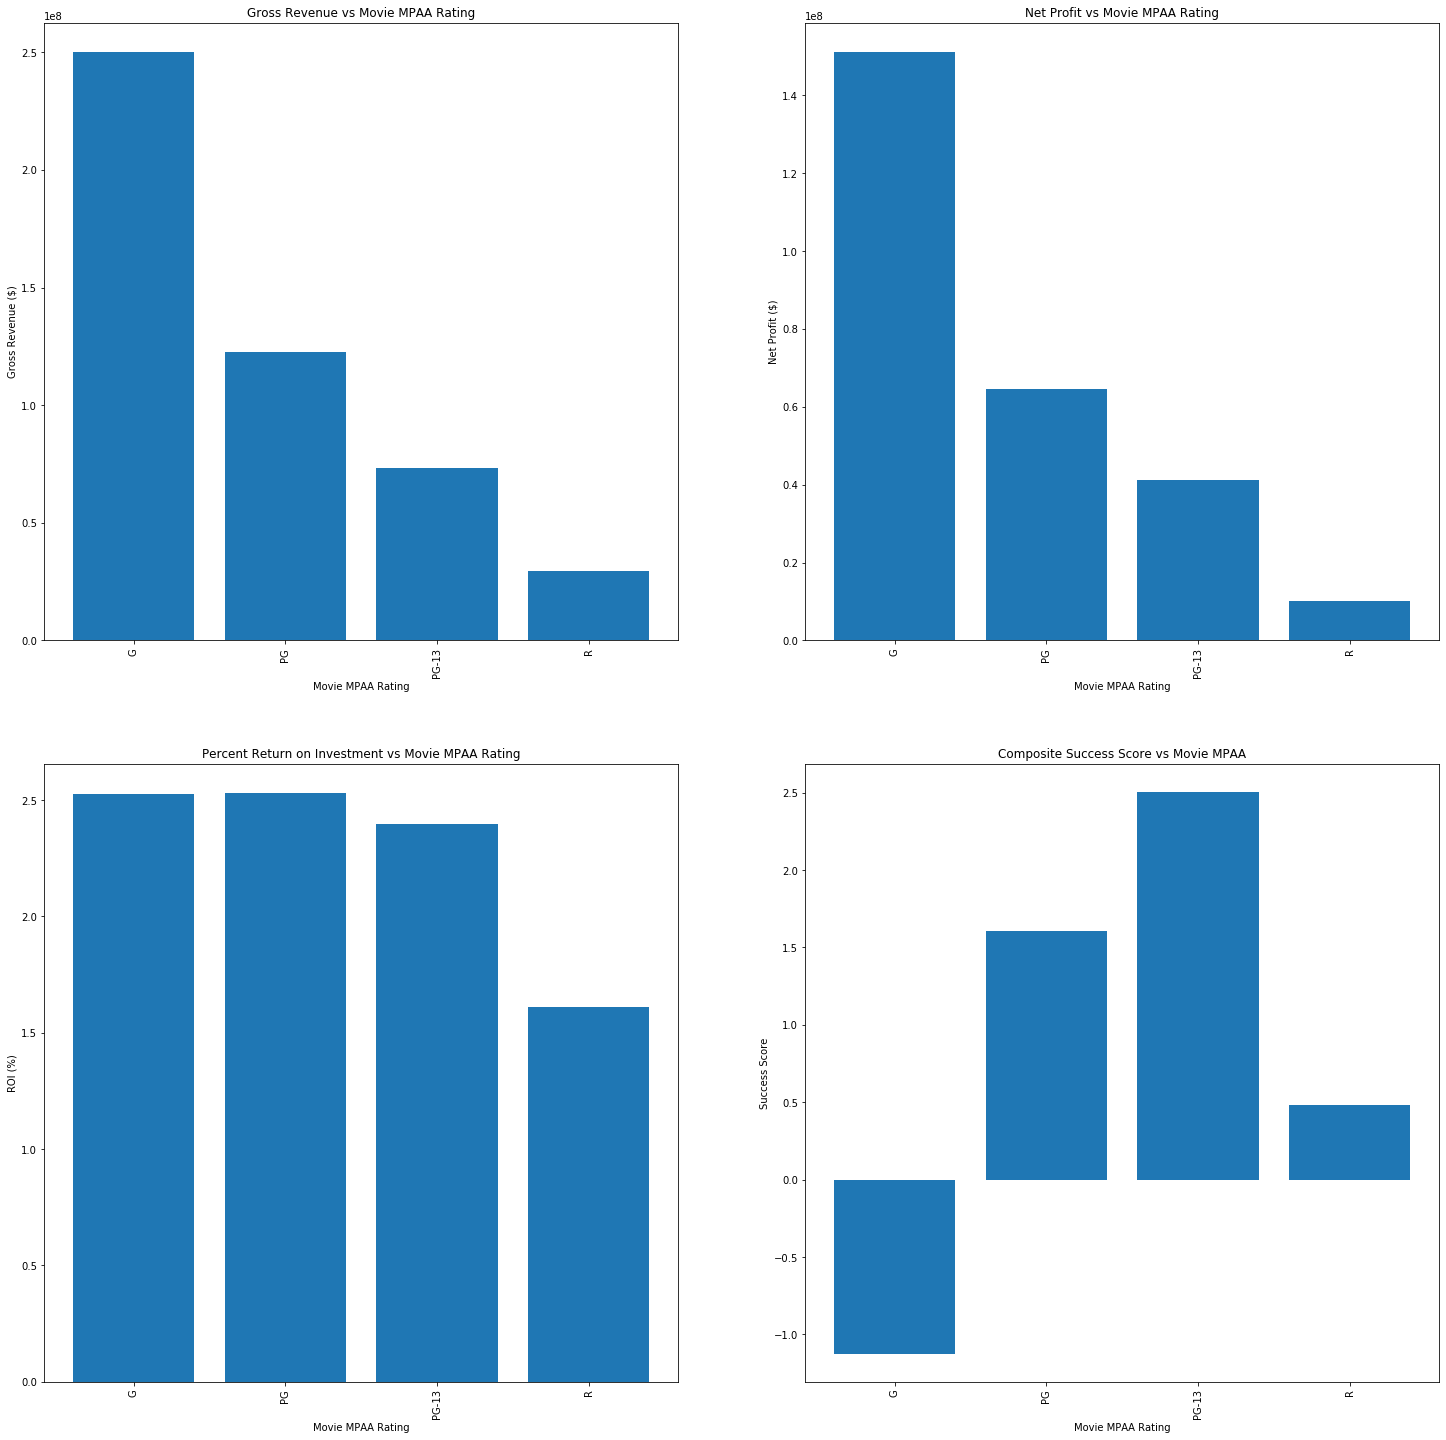

In [105]:
# Make copy of data from web
import copy
ratings_list_copy=copy.deepcopy(ratings_list)

# Reformat MPAA info and extract purely the actual rating string

mindex=list(range(0, len(ratings_list)))

for mi in mindex:
    cindex=list(range(0, len(ratings_list_copy[mi])))
    for ci in cindex:
        if "ated R " in ratings_list_copy[mi][ci]:
            ratings_list_copy[mi][ci]="R"
        elif "R for " in ratings_list_copy[mi][ci]:
            ratings_list_copy[mi][ci]="R"
        elif "13 for" in ratings_list_copy[mi][ci]:
            ratings_list_copy[mi][ci]="PG-13"
        elif "PG for" in ratings_list_copy[mi][ci]:
            ratings_list_copy[mi][ci]="PG"
        elif "Y7" in ratings_list_copy[mi][ci]:
            ratings_list_copy[mi][ci]="G"
        elif "TV-MA" in ratings_list_copy[mi][ci]:
            ratings_list_copy[mi][ci]="R"
        elif "TV-14" in ratings_list_copy[mi][ci]:
            ratings_list_copy[mi][ci]="PG-13"
        elif "TV-PG" in ratings_list_copy[mi][ci]:
            ratings_list_copy[mi][ci]="PG"
        elif "13 on" in ratings_list_copy[mi][ci]:
            ratings_list_copy[mi][ci]="PG-13"
        elif "-13  " in ratings_list_copy[mi][ci]:
            ratings_list_copy[mi][ci]="PG-13"
        elif "Unrated" in ratings_list_copy[mi][ci]:
            ratings_list_copy[mi][ci]="Not Rated"

# Categorizes all movies without rating as "Not Rated"
            
def empty_check(movies):
    rate_list=[]
    for movie in movies:
        rating=""
        for comment in movie:
            if comment=="R" or comment=="PG-13" or comment=="PG" or comment=="G" or comment=="Not Rated":
                rating=comment
        if rating=="":
            rating="Not Rated"
        rate_list.append(rating)    
    return rate_list

full_rating_list=empty_check(ratings_list_copy)

# Create new dataframe of rating data and unique movie ID
# Merge new rating dataframe to master dataset and group by each overall rating

rating_table=pd.DataFrame({"tconst":tconst_list, "mpaa_rating":full_rating_list})
complete_rating_table=pd.merge(rating_table, master_table, how="left", on="tconst")
complete_rating_table.groupby("mpaa_rating").median()

# Graph MPAA rating values against each of the four established measures of success

figure, ax = plt.subplots(2, 2, figsize=(25, 25))

# Establish x and y values for plots

x=complete_rating_table.groupby("mpaa_rating").median().index
y0_gross_rev= complete_rating_table.groupby("mpaa_rating").median().worldwide_gross
y1_net_prof= complete_rating_table.groupby("mpaa_rating").median().net_profit
y2_roi_percent= complete_rating_table.groupby("mpaa_rating").median().roi
y3_comp= complete_rating_table.groupby("mpaa_rating").mean().success_score 

# Set axes for all four graphs

ax[0][0].set_title('Gross Revenue vs Movie MPAA Rating')
ax[0][0].set_xlabel('Movie MPAA Rating')
ax[0][0].set_ylabel('Gross Revenue ($)')

ax[0][1].set_title('Net Profit vs Movie MPAA Rating')
ax[0][1].set_xlabel('Movie MPAA Rating')
ax[0][1].set_ylabel('Net Profit ($)')

ax[1][0].set_title('Percent Return on Investment vs Movie MPAA Rating')
ax[1][0].set_xlabel('Movie MPAA Rating')
ax[1][0].set_ylabel('ROI (%)')

ax[1][1].set_title('Composite Success Score vs Movie MPAA')
ax[1][1].set_xlabel('Movie MPAA Rating')
ax[1][1].set_ylabel('Success Score')

# Remove "Not Rated" category from graphs, as it's not relevant in finding target agegroup

x=[x[0], x[2], x[3], x[4]]
y0_gross_rev=[y0_gross_rev[0], y0_gross_rev[2], y0_gross_rev[3], y0_gross_rev[4]]
y1_net_prof=[y1_net_prof[0], y1_net_prof[2], y1_net_prof[3], y1_net_prof[4]]
y2_roi_percent=[y2_roi_percent[0], y2_roi_percent[2], y2_roi_percent[3], y2_roi_percent[4]]
y3_comp=[y3_comp[0], y3_comp[2], y3_comp[3], y3_comp[4]]

ax[0][0].set_xticklabels(x,rotation=90)
ax[0][1].set_xticklabels(x,rotation=90)
ax[1][0].set_xticklabels(x,rotation=90)
ax[1][1].set_xticklabels(x,rotation=90)

# Graph the four plots

ax[0][0].bar(x, y0_gross_rev)
ax[0][1].bar(x, y1_net_prof)
ax[1][0].bar(x, y2_roi_percent)
ax[1][1].bar(x, y3_comp)



# Business Problem

Similar to other large tech companies, Microsoft has made the decision to create a movie streaming service, complete with their own originally produced content. As this is an entirely new venture for Microsoft, they need guidance in order to make the service successful. Specifically, they need to know what sort of movies to produce. As this is a fairly open-ended objective, it is the responsibility of the data science team to both quantify the term "success" as well as determining drivers that lead to such success.

Since Microsoft is a business whose overall goal is to make money, the data science team chooses to quantify a film's success by its financials. As such, three main and basic financial indicators are used in order to determine whether or not a film is a success. These indicators are gross revenue, net profit, and percent return on investment.
    
Realizing that movie quality (or critical acclaim) could be considered a separate gauge success not necessarily represented in a film's financials, the team adds a fourth metric to its success indicators that weights return on investment by popular quality vote from internet movie databases. This last metric will subsequently be referred to as the success composite and is calculated by multiply ROI by the film's popular quality rating out of ten. Altogether then, the criteria used to define a film's success is as follows:

    1. Gross Revenue
    2. Net Profit (Revenue minus production costs)
    3. Percent Return on Investment (ROI)
    4. Success Composite (Quality-weighted ROI)

With this criteria established, it is the task of the data science team to find what drivers maximize those four metrics. To do so, the team runs an analysis on historical movie data from IMDB to identify specific movie traits that lead to success. In particular, the following seven characteristics are examined:

    1. Genre
    2. Runtime (Length)
    3. Production Budget
    4. Target Audience
    5. Director
    6. Composer
    7. Release Year

Overall, then, it is the goal of the data science team to answer the questions, "To what degree does each one of these traits influence a film's success? And what exactly is the nature of that influence?" Armed with this knowledge, Microsoft will have an idea of the approximate profiles of films they should make for their streaming service.

# Data Understanding

Mentioned in the Business Problem, the team is using historical film data in order to run analyses and find trends. This data comes from the following online movie databases:

    - Box Office Mojo
    - IMDB
    - Rotten Tomatoes
    - The MovieDB.org
    
From these data bases, four particular files are mainly used (imdb.title.basics.csv.gz, tn.movie_budgets.csv.gz, imdb.title.akas.csv.gz, imdb.title.ratings.csv.gz). These files specifically contain all financial data necessary for calculating the four success indicators (production budgets, worldwide gross revenues, popularity rating), as well as all seven film characteristics to be examined. This info is then merged in order to link together each of these bits of info together, at which point film characteristics can be correlated to success metrics to determine their impact.

Movie sample sizes between the different files range from thousands of entries to hundreds of thousands. To maintain integrity and completeness of the data, movies with missing information for any of the success criteria or examined characteristics are omitted. Additionally, movies with less than 100 viewer ratings on IMDB are intentionally omitted as well to ensure the legitimacy of the film. It will be discussed later in the analysis, but web calls and scrubbing of IMDB is also used in order to supplement gaps in supplied data for MPAA ratings.